In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_bersih_fix_english.xlsx to data_bersih_fix_english (1).xlsx


In [ ]:
import pandas as pd

In [ ]:
final_data = pd.read_excel("data_bersih_fix_english.xlsx")
final_data

,Unnamed: 0,Tweet,label
0,0,merdeka study at merdeka campus as an effort t...,1
1,1,"he said that now he is free to learn anything,...",2
2,2,"In my opinion, the independent learning appren...",1
3,3,eh independent study can only be in the third ...,0
4,4,the name of self-study sometimes enthusiasm is...,0
...,...,...,...
3013,3013,"thank you so much for the advice slowly, the f...",1
3014,3014,closed the series of big agendas of the head o...,0
3015,3015,the new learning independence curriculum pet s...,1
3016,3016,Nadiem conveyed the independent study policy a...,0


In [ ]:
from textblob import TextBlob

def getSubjectivity(review):
  return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
  return TextBlob(review).sentiment.polarity

def analyze(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

In [ ]:
final_data['subjectivity'] = final_data['Tweet'].apply(getSubjectivity)
final_data['polarity'] = final_data['Tweet'].apply(getPolarity)

final_data.head()

,Unnamed: 0,Tweet,label,subjectivity,polarity
0,0,merdeka study at merdeka campus as an effort t...,1,0.855556,0.533333
1,1,"he said that now he is free to learn anything,...",2,0.471429,0.164286
2,2,"In my opinion, the independent learning appren...",1,0.531250,-0.125000
3,3,eh independent study can only be in the third ...,0,0.415179,0.071429
4,4,the name of self-study sometimes enthusiasm is...,0,0.344444,-0.077778


In [ ]:
final_data['TextBlob'] = final_data['polarity'].apply(analyze)
final_data.head()

,Unnamed: 0,Tweet,label,subjectivity,polarity,TextBlob
0,0,merdeka study at merdeka campus as an effort t...,1,0.855556,0.533333,positive
1,1,"he said that now he is free to learn anything,...",2,0.471429,0.164286,positive
2,2,"In my opinion, the independent learning appren...",1,0.531250,-0.125000,negative
3,3,eh independent study can only be in the third ...,0,0.415179,0.071429,positive
4,4,the name of self-study sometimes enthusiasm is...,0,0.344444,-0.077778,negative


In [ ]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

positive    1574
neutral     1082
negative     362
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f7826b83a60>,
 [Text(-0.07437121426914299, 1.09748299416808, 'positive'),
  Text(-0.33468741692155346, -1.0478474759975225, 'neutral'),
  Text(1.2552809140846075, -0.4967593247588937, 'negative')],
 [Text(-0.04056611687407799, 0.5986270877280435, '52.2%'),
  Text(-0.18255677286630187, -0.5715531687259213, '35.9%'),
  Text(0.7903620570162343, -0.31277438966300714, '12.0%')])

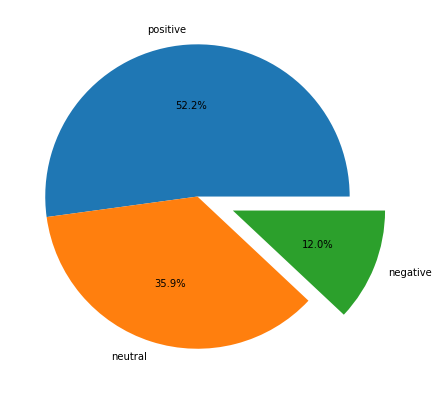

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
# Select Only Column
data1 = final_data[['Tweet', 'label', 'TextBlob']]
data1

,Tweet,label,TextBlob
0,merdeka study at merdeka campus as an effort t...,1,positive
1,"he said that now he is free to learn anything,...",2,positive
2,"In my opinion, the independent learning appren...",1,negative
3,eh independent study can only be in the third ...,0,positive
4,the name of self-study sometimes enthusiasm is...,0,negative
...,...,...,...
3013,"thank you so much for the advice slowly, the f...",1,positive
3014,closed the series of big agendas of the head o...,0,negative
3015,the new learning independence curriculum pet s...,1,positive
3016,Nadiem conveyed the independent study policy a...,0,positive


In [ ]:
#download dataset
from google.colab import files 

data1.to_excel('data_bersih_fix.xlsx') 
files.download('data_bersih_fix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>